In [6]:
! kaggle datasets download -d alxmamaev/flowers-recognition


  0%|          | 0.00/225M [00:00<?, ?B/s]
  0%|          | 1.00M/225M [00:01<06:12, 631kB/s]
  1%|          | 2.00M/225M [00:02<04:41, 829kB/s]
  1%|▏         | 3.00M/225M [00:03<04:19, 898kB/s]
  2%|▏         | 4.00M/225M [00:04<04:23, 877kB/s]
  2%|▏         | 5.00M/225M [00:05<04:05, 938kB/s]
  3%|▎         | 6.00M/225M [00:06<03:53, 982kB/s]
  3%|▎         | 7.00M/225M [00:07<03:45, 1.01MB/s]
  4%|▎         | 8.00M/225M [00:08<03:43, 1.02MB/s]
  4%|▍         | 9.00M/225M [00:10<03:57, 951kB/s] 
  4%|▍         | 10.0M/225M [00:11<03:52, 967kB/s]
  5%|▍         | 11.0M/225M [00:12<03:50, 974kB/s]
  5%|▌         | 12.0M/225M [00:13<03:47, 982kB/s]
  6%|▌         | 13.0M/225M [00:14<03:38, 1.02MB/s]
  6%|▌         | 14.0M/225M [00:15<03:32, 1.04MB/s]
  7%|▋         | 15.0M/225M [00:16<03:41, 994kB/s] 
  7%|▋         | 16.0M/225M [00:17<03:50, 950kB/s]
  8%|▊         | 17.0M/225M [00:18<04:01, 902kB/s]
  8%|▊         | 18.0M/225M [00:19<03:46, 957kB/s]
  8%|▊         | 19.0M/225M [00:

In [10]:
from zipfile import ZipFile

data_ds_path = './flowers-recognition.zip'
with ZipFile(data_ds_path, 'r') as zip:
    zip.extractall()
    print('Data-Sets is extracted')


Data-Sets is extracted


In [50]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model

In [51]:
tf.get_logger().setLevel('ERROR')

In [12]:
count = 0
dirs = os.listdir('./flowers/')
for dir in dirs:
    files = list(os.listdir('flowers/'+dir))
    print(dir + 'with ' + str(len(files)) + 'image')
    count = count+ len(files)
print(f'The total images equal to: {str(count)}')

daisywith 764image
dandelionwith 1052image
rosewith 784image
sunflowerwith 733image
tulipwith 984image
The total images equal to: 4317


In [13]:
IMG_SIZE = 180
BATCH_SIZE= 32

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='./flowers',
    seed=42,
    validation_split=0.2,
    subset='training',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory= './flowers',
    seed=42,
    validation_split=0.2,
    subset='validation',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE)
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [17]:
flowers_names = train_ds.class_names
flowers_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

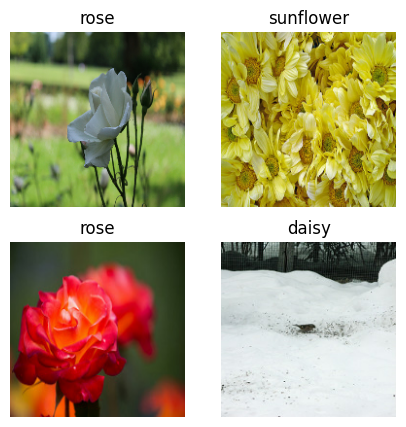

In [42]:
idx = 0
plt.figure(figsize=(5, 5))

for img, label in train_ds.take(1):
    for idx  in range(4):
        plt.subplot(2, 2, idx+1)
        plt.imshow(img[idx].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(flowers_names[label[idx]])

In [43]:
AUTOTUNE = tf.data.AUTOTUNE

In [44]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)

In [45]:
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

In [46]:
# Image augmentation

data_aug = Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(IMG_SIZE, IMG_SIZE)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

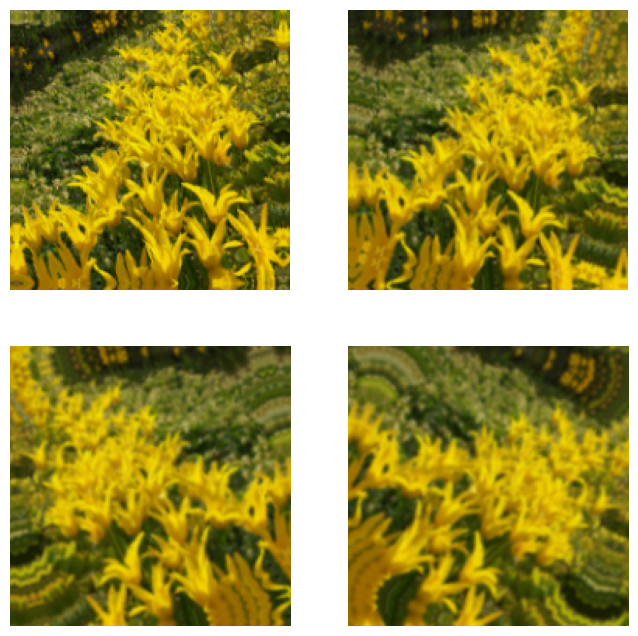

In [52]:
idx = 0
plt.figure(figsize=(8, 8))

for img, label in train_ds.take(1):
    for idx in range(4):
        img = data_aug(img)
        plt.subplot(2, 2, idx+1)
        plt.imshow(img[0].numpy().astype('uint8'))
        plt.axis('off')


In [53]:
len(flowers_names)

5

In [55]:
model = Sequential([
    data_aug,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(flowers_names))

])

ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 180, 180)